In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# import the dataset

df = pd.read_csv(r'E:\Courses\Python\VS Code - Files\Superstore Sales Analysis\train.csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [4]:
# general overview of the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [5]:
# calculating the number of null values

null_count = df['Postal Code'].isnull().sum()
print(null_count)

11


In [6]:
# Replacing the null values with 0 and changing the datatype from float to int

df["Postal Code"].fillna(0, inplace=True)
df["Postal Code"] = df["Postal Code"].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9800 non-null   int32  
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [7]:
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9800.000000,9800.000000
mean,4900.500000,55211.280918,230.769059
std,2829.160653,32076.677954,626.651875
min,1.000000,0.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,57551.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


# DATA CLEANING

In [8]:
# check for duplicates

if df.duplicated().sum() > 0:
    print("Duplicates are present")
else:
    print("No Duplicates exist")

No Duplicates exist


In [9]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9795    False
9796    False
9797    False
9798    False
9799    False
Length: 9800, dtype: bool

In [10]:
df.duplicated(keep=False).sum()

0

In [11]:
# Customer Analysis

df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,3,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62


In [12]:
types_of_customers = df['Segment'].unique()
print(types_of_customers)

['Consumer' 'Corporate' 'Home Office']


In [15]:
number_of_customers = df['Segment'].value_counts().reset_index()

print(number_of_customers)

       Segment  count
0     Consumer   5101
1    Corporate   2953
2  Home Office   1746


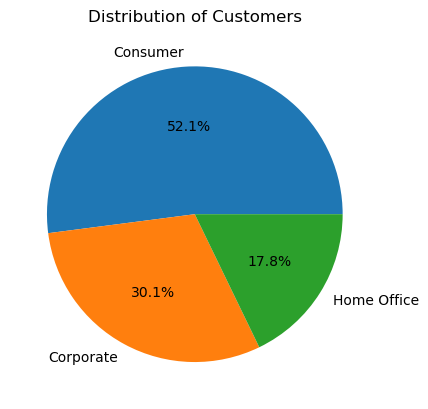

In [16]:
plt.pie(number_of_customers['count'], labels=number_of_customers['Segment'], autopct='%1.1f%%')
plt.title('Distribution of Customers')
plt.show()

In [17]:
sales_per_category = df.groupby('Segment')['Sales'].sum().reset_index()
print(sales_per_category)

       Segment         Sales
0     Consumer  1.148061e+06
1    Corporate  6.884941e+05
2  Home Office  4.249822e+05


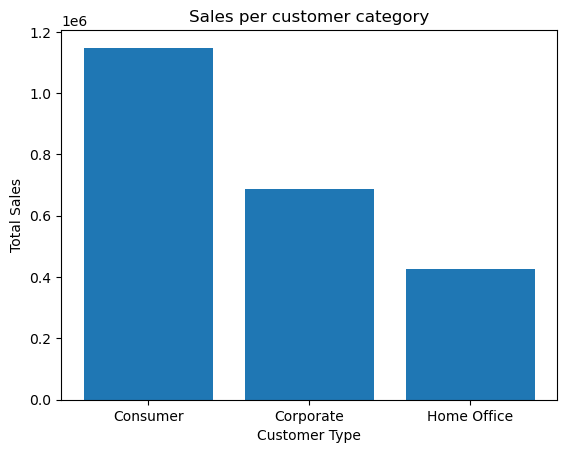

In [18]:
plt.bar(sales_per_category['Segment'], sales_per_category['Sales'])
plt.title('Sales per customer category')
plt.xlabel('Customer Type')
plt.ylabel('Total Sales')

plt.show()

In [21]:
#Custmer Loyalty

customer_order_frequency = df.groupby(['Customer ID', 'Customer Name', 'Segment'])['Order ID'].count().reset_index()
customer_order_frequency.rename(columns={'Order ID':'Total Orders'}, inplace = True)

repeat_customers = customer_order_frequency[customer_order_frequency['Total Orders'] >= 1]
sorted_repeat_customers = repeat_customers.sort_values(by='Total Orders', ascending=False)

print(sorted_repeat_customers.head(10).reset_index(drop=True))

  Customer ID        Customer Name      Segment  Total Orders
0    WB-21850        William Brown     Consumer            35
1    PP-18955           Paul Prost  Home Office            34
2    MA-17560         Matt Abelman  Home Office            34
3    JL-15835             John Lee     Consumer            33
4    CK-12205  Chloris Kastensmidt     Consumer            32
5    SV-20365          Seth Vernon     Consumer            32
6    JD-15895     Jonathan Doherty    Corporate            32
7    AP-10915       Arthur Prichep     Consumer            31
8    ZC-21910     Zuschuss Carroll     Consumer            31
9    EP-13915           Emily Phan     Consumer            31


In [23]:
customer_sales = df.groupby(['Customer ID', 'Customer Name', 'Segment'])['Sales'].sum().reset_index()
top_spenders = customer_sales.sort_values(by='Sales', ascending=False)

print(top_spenders.head(10).reset_index(drop=True))

  Customer ID       Customer Name      Segment      Sales
0    SM-20320         Sean Miller  Home Office  25043.050
1    TC-20980        Tamara Chand    Corporate  19052.218
2    RB-19360        Raymond Buch     Consumer  15117.339
3    TA-21385        Tom Ashbrook  Home Office  14595.620
4    AB-10105       Adrian Barton     Consumer  14473.571
5    KL-16645        Ken Lonsdale     Consumer  14175.229
6    SC-20095        Sanjit Chand     Consumer  14142.334
7    HL-15040        Hunter Lopez     Consumer  12873.298
8    SE-20110        Sanjit Engle     Consumer  12209.438
9    CC-12370  Christopher Conant     Consumer  12129.072


In [24]:
type_of_shipping = df['Ship Mode'].unique()
print(type_of_shipping)

['Second Class' 'Standard Class' 'First Class' 'Same Day']


In [25]:
shipping_mode = df['Ship Mode'].value_counts().reset_index()
print(shipping_mode)

        Ship Mode  count
0  Standard Class   5859
1    Second Class   1902
2     First Class   1501
3        Same Day    538


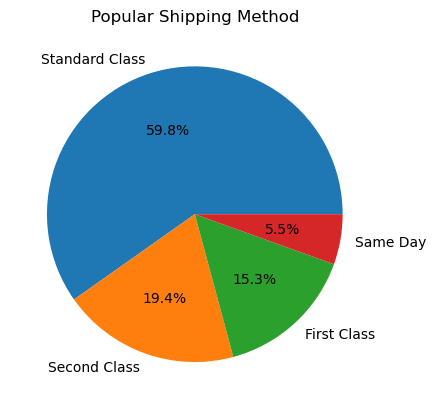

In [26]:
plt.pie(shipping_mode['count'], labels=shipping_mode['Ship Mode'], autopct='%1.1f%%')
plt.title('Popular Shipping Method')

plt.show()

In [27]:
state = df['State'].value_counts().reset_index()
print(state)

                   State  count
0             California   1946
1               New York   1097
2                  Texas    973
3           Pennsylvania    582
4             Washington    504
5               Illinois    483
6                   Ohio    454
7                Florida    373
8               Michigan    253
9         North Carolina    247
10              Virginia    224
11               Arizona    223
12             Tennessee    183
13              Colorado    179
14               Georgia    177
15              Kentucky    137
16               Indiana    135
17         Massachusetts    135
18                Oregon    122
19            New Jersey    122
20              Maryland    105
21             Wisconsin    105
22              Delaware     93
23             Minnesota     89
24           Connecticut     82
25              Missouri     66
26              Oklahoma     66
27               Alabama     61
28              Arkansas     60
29          Rhode Island     55
30      

In [28]:
City = df['City'].value_counts().reset_index()
print(City)

              City  count
0    New York City    891
1      Los Angeles    728
2     Philadelphia    532
3    San Francisco    500
4          Seattle    426
..             ...    ...
524      San Mateo      1
525       Cheyenne      1
526         Conway      1
527      Melbourne      1
528     Springdale      1

[529 rows x 2 columns]


In [30]:
state_sales = df.groupby(['State'])['Sales'].sum().reset_index()
top_state_sales = state_sales.sort_values(by='Sales', ascending=False)

print(top_state_sales.head(10).reset_index(drop=True))

          State        Sales
0    California  446306.4635
1      New York  306361.1470
2         Texas  168572.5322
3    Washington  135206.8500
4  Pennsylvania  116276.6500
5       Florida   88436.5320
6      Illinois   79236.5170
7      Michigan   76136.0740
8          Ohio   75130.3500
9      Virginia   70636.7200


In [31]:
city_sales = df.groupby(['City'])['Sales'].sum().reset_index()
top_city_sales = city_sales.sort_values(by='Sales', ascending=False)

print(top_city_sales.head(10).reset_index(drop=True))

            City        Sales
0  New York City  252462.5470
1    Los Angeles  173420.1810
2        Seattle  116106.3220
3  San Francisco  109041.1200
4   Philadelphia  108841.7490
5        Houston   63956.1428
6        Chicago   47820.1330
7      San Diego   47521.0290
8   Jacksonville   44713.1830
9        Detroit   42446.9440


In [33]:
product_category = df['Category'].unique()
print(product_category)

['Furniture' 'Office Supplies' 'Technology']


In [35]:
subcategory_count = df.groupby('Category')['Sub-Category'].nunique().reset_index()
subcategory_count = subcategory_count.sort_values(by='Sub-Category', ascending=False)

print(subcategory_count.reset_index(drop=True))

          Category  Sub-Category
0  Office Supplies             9
1        Furniture             4
2       Technology             4


In [36]:
category_sales = df.groupby(['Category'])['Sales'].sum().reset_index()
category_sales = category_sales.sort_values(by='Sales', ascending=False)

print(category_sales.reset_index(drop=True))

          Category        Sales
0       Technology  827455.8730
1        Furniture  728658.5757
2  Office Supplies  705422.3340


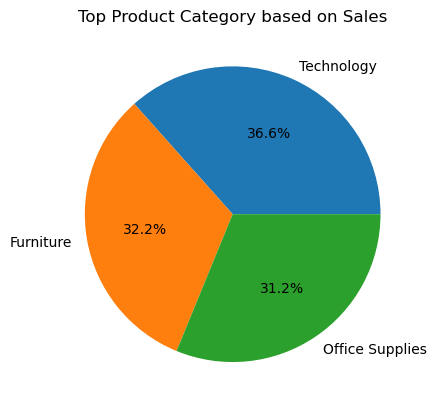

In [39]:
plt.pie(category_sales['Sales'], labels=category_sales['Category'], autopct='%1.1f%%')
plt.title('Top Product Category based on Sales')

plt.show()

In [41]:
pdt_subcategory = df.groupby(['Sub-Category'])['Sales'].sum().reset_index()
top_pdt_subcategory = pdt_subcategory.sort_values(by='Sales', ascending=False)

print(top_pdt_subcategory.reset_index(drop=True))

   Sub-Category        Sales
0        Phones  327782.4480
1        Chairs  322822.7310
2       Storage  219343.3920
3        Tables  202810.6280
4       Binders  200028.7850
5      Machines  189238.6310
6   Accessories  164186.7000
7       Copiers  146248.0940
8     Bookcases  113813.1987
9    Appliances  104618.4030
10  Furnishings   89212.0180
11        Paper   76828.3040
12     Supplies   46420.3080
13          Art   26705.4100
14    Envelopes   16128.0460
15       Labels   12347.7260
16    Fasteners    3001.9600


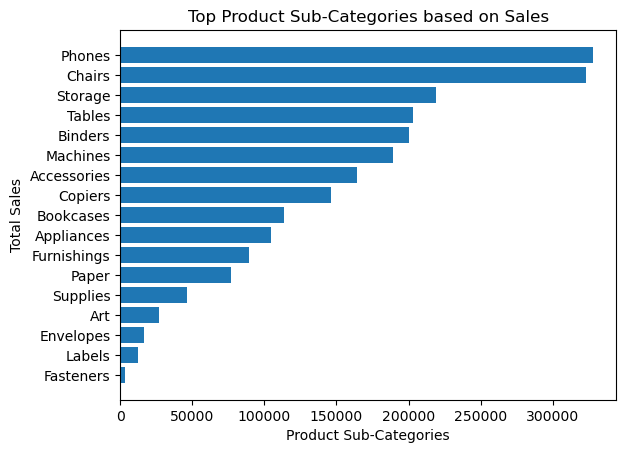

In [43]:
top_pdt_subcategory = top_pdt_subcategory.sort_values(by='Sales', ascending=True)

plt.barh(top_pdt_subcategory['Sub-Category'], top_pdt_subcategory['Sales'])
plt.title('Top Product Sub-Categories based on Sales')
plt.xlabel('Product Sub-Categories')
plt.ylabel('Total Sales')

plt.show()

In [44]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
yearly_sales = df.groupby(df['Order Date'].dt.year)['Sales'].sum()
yearly_sales = yearly_sales.reset_index()

print(yearly_sales)

   Order Date        Sales
0        2015  479856.2081
1        2016  459436.0054
2        2017  600192.5500
3        2018  722052.0192


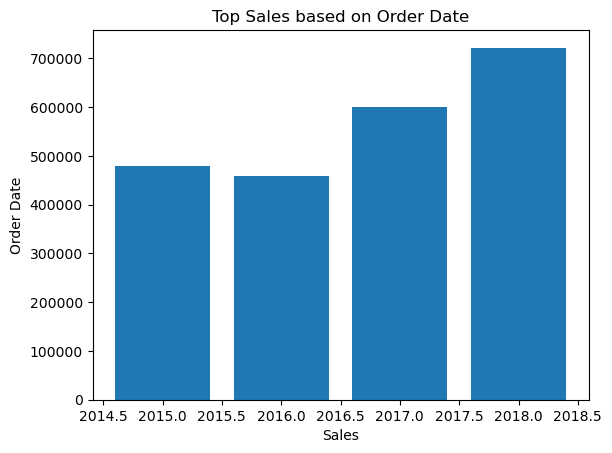

In [47]:
yearly_sales = yearly_sales.sort_values(by='Sales', ascending=True)

plt.bar(yearly_sales['Order Date'], yearly_sales['Sales'])
plt.title('Top Sales based on Order Date')
plt.xlabel('Sales')
plt.ylabel('Order Date')

plt.show()

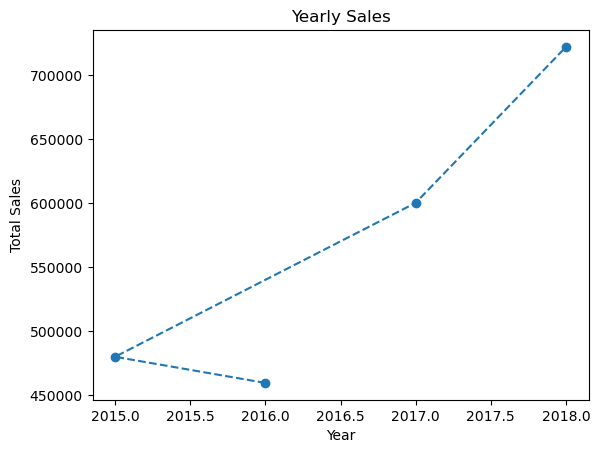

In [50]:
plt.plot(yearly_sales['Order Date'], yearly_sales['Sales'], marker='o', linestyle='--')

plt.title('Yearly Sales')
plt.xlabel('Year')
plt.ylabel('Total Sales')

plt.show()

In [53]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
year_sales = df[df['Order Date'].dt.year==2018]
quarterly_sales = year_sales.resample('Q', on='Order Date')['Sales'].sum()
quarterly_sales = quarterly_sales.reset_index()

print('This is the quarterly sales for 2018')
print(quarterly_sales)

This is the quarterly sales for 2018
  Order Date        Sales
0 2018-03-31  122260.8842
1 2018-06-30  127558.6200
2 2018-09-30  193815.8400
3 2018-12-31  278416.6750


In [54]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
year_sales = df[df['Order Date'].dt.year==2018]
monthly_sales = year_sales.resample('M', on='Order Date')['Sales'].sum()
monthly_sales = monthly_sales.reset_index()

print('This is the monthly sales for 2018')
print(monthly_sales)

This is the monthly sales for 2018
   Order Date        Sales
0  2018-01-31   43476.4740
1  2018-02-28   19920.9974
2  2018-03-31   58863.4128
3  2018-04-30   35541.9101
4  2018-05-31   43825.9822
5  2018-06-30   48190.7277
6  2018-07-31   44825.1040
7  2018-08-31   62837.8480
8  2018-09-30   86152.8880
9  2018-10-31   77448.1312
10 2018-11-30  117938.1550
11 2018-12-31   83030.3888
